# On Prem Whisper Estimate

This notebook contains some rudimentary analysis of the results from running whisper testing using the process outlined in the [README.md](README.md). It specifically looks at how long we might expect running Whisper on premises using hardware similar to the RDF GPU workstation.

## SDR Data

First lets load the metadata for the items that were selected for the analysis. The CSV was obtained from the [Media for Whisper Pilot](https://docs.google.com/spreadsheets/d/1sgcxy0eNwWTn1LeMVH8TDJ6J8qL8iIGfZ25t4nmYqyQ/edit#gid=0) Google Sheet.

In [1]:
import pandas

sdr = pandas.read_csv('../sdr-data.csv')
sdr.head(5)

,Druid,Argo Link,PURL,Title,Notes,Source language,Duration,Speech Begins,Tasks,"Captions / Transcript File? (Type, Lang)",Testing Focus,Redundant? Omit?
0,bb158br2509,https://argo.stanford.edu/view/druid:bb158br2509,https://purl.stanford.edu/bb158br2509,Project South - S611,"Clear spoken audio, persistant hum in the back...",English,1842,0:00:02,"Run through medium and large models, track tim...","Yes (vtt and txt, English)",Preprocessing (remove background noise). Strai...,NaN
1,bg405cn7261,https://argo.stanford.edu/view/druid:bg405cn7261,https://purl.stanford.edu/bg405cn7261,"Whitmire, Amanda L. Student work, copyright an...","Clear spoken audio, uses language and acronyms...",English,655,0:00:24,"Run through medium and large models, track tim...","Yes (vtt and txt, English)","Transcription. Acronyms, subject-specific terms.",NaN
2,bh446wm7842,https://argo.stanford.edu/view/druid:bh446wm7842,https://purl.stanford.edu/bh446wm7842,"Telmet, Kaja, 1950 Oral history interview with...","Clear spoken audio, in Estonian. We have Russi...",Estonian,9642,0:00:03,"Run through medium and large models, obtain Es...","Yes (vtt, English and Russian)",Translation (Estonian to English or Russian). ...,NaN
3,br525sp8033,https://argo.stanford.edu/view/druid:br525sp8033,https://purl.stanford.edu/br525sp8033,"USSR Exhibit 401: ""German Destruction in USSR""...","Clear spoken audio in Russian, some cracks and...",Russian,471,0:00:04,"Run through medium and large models, obtain Ru...","Yes (vtt and txt, English and Russian)","Testing Russian transcription, and/or translat...",NaN
4,bw689yg2740,https://argo.stanford.edu/view/druid:bw689yg2740,https://purl.stanford.edu/bw689yg2740,Stanford University. Native American Cultural ...,Inconsistent audio quality due to mic placemen...,English,5080,0:00:04,"Run through medium and large models, track tim...","Yes (vtt and txt, English)","Transcription, multiple speakers. Diarization ...",NaN


## Whisper Results

Next lets get the Whisper results for one of the test runs that were performed using the [RDS/DLSS GPU Workstation](https://docs.google.com/document/d/1k4fTuLUpT1S7WGtYTLPdE9pI_UwffiOW4-lcJKpIaW0/edit#heading=h.k6w3eccrwgdq).

In [29]:
whisper = pandas.read_csv('../docs/output-2024-04-11/report-whisper.csv')
whisper.head(5)

,run_id,druid,file,language,transcript_filename,transcript_language,runtime,wer,mer,wil,wip,hits,substitutions,insertions,deletions,diff,options
0,bb158br2509-whisper-021,bb158br2509,bb158br2509_sl.m4a,en,bb158br2509_script.txt,en,277.444349,0.055188,0.054538,0.076508,0.923492,4334,102,54,94,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/bb158br2509-whisper-021.html,"{'model_name': 'large', 'beam_size': 5, 'patience': 2.0, 'condition_on_previous_text': True, 'best_of': 5}"
1,bb158br2509-whisper-022,bb158br2509,bb158br2509_sl.m4a,en,bb158br2509_script.txt,en,277.511495,0.055188,0.054538,0.076508,0.923492,4334,102,54,94,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/bb158br2509-whisper-022.html,"{'model_name': 'large', 'beam_size': 5, 'patience': 2.0, 'condition_on_previous_text': True, 'best_of': 10}"
2,bb158br2509-whisper-037,bb158br2509,bb158br2509_sl.m4a,en,bb158br2509_script.txt,en,277.280526,0.055188,0.054538,0.076508,0.923492,4334,102,54,94,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/bb158br2509-whisper-037.html,"{'model_name': 'large-v3', 'beam_size': 5, 'patience': 2.0, 'condition_on_previous_text': True, 'best_of': 5}"
3,bb158br2509-whisper-038,bb158br2509,bb158br2509_sl.m4a,en,bb158br2509_script.txt,en,277.261359,0.055188,0.054538,0.076508,0.923492,4334,102,54,94,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/bb158br2509-whisper-038.html,"{'model_name': 'large-v3', 'beam_size': 5, 'patience': 2.0, 'condition_on_previous_text': True, 'best_of': 10}"
4,bb158br2509-whisper-017,bb158br2509,bb158br2509_sl.m4a,en,bb158br2509_script.txt,en,276.907950,0.058499,0.057659,0.079835,0.920165,4331,103,66,96,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/bb158br2509-whisper-017.html,"{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': True, 'best_of': 5}"


## Processing the Backlog with Whisper

Andrew Berger did some analysis of publicly available SDR media content which would benefit from transcription. He found 48,824 hours of content (175,766,400 seconds).

Based on our Whisper results how long would it take to process this content sequentially using equivalent hardware to the GPU Workstation? Note, this hardware only supports one process accessing the Whisper Large model at a time.

The Whisper results include multiple runs with the same file but with different options. Lets get the runtime for each file using the Whisper default options and the 'large' model to estimate.

In [30]:
whisper = whisper[whisper.options == "{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': True, 'best_of': 5}"]
whisper = whisper.set_index('druid')
whisper.head(5)

,run_id,file,language,transcript_filename,transcript_language,runtime,wer,mer,wil,wip,hits,substitutions,insertions,deletions,diff,options
druid,,,,,,,,,,,,,,,,
bb158br2509,bb158br2509-whisper-017,bb158br2509_sl.m4a,en,bb158br2509_script.txt,en,276.907950,0.058499,0.057659,0.079835,0.920165,4331,103,66,96,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/bb158br2509-whisper-017.html,"{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': True, 'best_of': 5}"
bg405cn7261,bg405cn7261-whisper-065,bg405cn7261_v2_sl.mp4,en,bg405cn7261_v2_sl_script.txt,en,148.304139,0.062193,0.059406,0.069897,0.930103,1805,20,86,8,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/bg405cn7261-whisper-065.html,"{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': True, 'best_of': 5}"
bw689yg2740,bw689yg2740-whisper-161,bw689yg2740_sl.mp4,en,bw689yg2740_script.txt,en,971.707062,0.130416,0.122103,0.159572,0.840428,10605,457,770,248,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/bw689yg2740-whisper-161.html,"{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': True, 'best_of': 5}"
fh290wd1772,fh290wd1772-whisper-209,fh290wd1772_v2_sp_sl.m4a,en,fh290wd1772_v2_sp_sl_script.txt,en,30.420051,0.333333,0.318560,0.419177,0.580823,246,40,16,59,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/fh290wd1772-whisper-209.html,"{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': True, 'best_of': 5}"
gj097zq7635,gj097zq7635-whisper-257,gj097zq7635_a_sl.m4a,en,gj097zq7635_a_sl_script.txt,en,531.052633,0.132694,0.124085,0.165208,0.834792,6939,333,514,136,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/gj097zq7635-whisper-257.html,"{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': True, 'best_of': 5}"


Now the Duration from the SDR data can be joined in:

In [31]:
whisper = whisper.join(sdr.set_index('Druid'))
whisper.head(5)

,run_id,file,language,transcript_filename,transcript_language,runtime,wer,mer,wil,wip,...,PURL,Title,Notes,Source language,Duration,Speech Begins,Tasks,"Captions / Transcript File? (Type, Lang)",Testing Focus,Redundant? Omit?
druid,,,,,,,,,,,,,,,,,,,,,
bb158br2509,bb158br2509-whisper-017,bb158br2509_sl.m4a,en,bb158br2509_script.txt,en,276.907950,0.058499,0.057659,0.079835,0.920165,...,https://purl.stanford.edu/bb158br2509,Project South - S611,"Clear spoken audio, persistant hum in the background that may cause an issue with speech detection.",English,1842,0:00:02,"Run through medium and large models, track time and assess quality","Yes (vtt and txt, English)","Preprocessing (remove background noise). Straightforward transcription task, good for testing model parameters.",NaN
bg405cn7261,bg405cn7261-whisper-065,bg405cn7261_v2_sl.mp4,en,bg405cn7261_v2_sl_script.txt,en,148.304139,0.062193,0.059406,0.069897,0.930103,...,https://purl.stanford.edu/bg405cn7261,"Whitmire, Amanda L. Student work, copyright and FERPA: how what you don't know might FERP-YA: Stanford (Calif.), 2020-02-10","Clear spoken audio, uses language and acronyms that might be challenging for Whisper. Interestingly the auto-captions that are burned in are inaccurate.",English,655,0:00:24,"Run through medium and large models, track time and assess quality","Yes (vtt and txt, English)","Transcription. Acronyms, subject-specific terms.",NaN
bw689yg2740,bw689yg2740-whisper-161,bw689yg2740_sl.mp4,en,bw689yg2740_script.txt,en,971.707062,0.130416,0.122103,0.159572,0.840428,...,https://purl.stanford.edu/bw689yg2740,"Stanford University. Native American Cultural Center Native American Research Forum : Honoring Native Scholarship. Tape #1: Stanford (Calif.), 1995-04-08","Inconsistent audio quality due to mic placement, multiple languages (including native languages), tribal names, acronyms, proper nouns.",English,5080,0:00:04,"Run through medium and large models, track time and assess quality","Yes (vtt and txt, English)","Transcription, multiple speakers. Diarization (if applicable).",NaN
fh290wd1772,fh290wd1772-whisper-209,fh290wd1772_v2_sp_sl.m4a,en,fh290wd1772_v2_sp_sl_script.txt,en,30.420051,0.333333,0.318560,0.419177,0.580823,...,https://purl.stanford.edu/fh290wd1772,I Don't Know Where I'm Goin' But I'm On My Way,"Oldest format in our collections, decent audio quality but has pops/crackles. No corresponding Rev file, although we can easily get one.",English,133,0:00:00,"Run through medium and large models, track time and assess quality","Yes (vtt and txt, English)",Transcription. Media with degraded/low quality audio.,NaN
gj097zq7635,gj097zq7635-whisper-257,gj097zq7635_a_sl.m4a,en,gj097zq7635_a_sl_script.txt,en,531.052633,0.132694,0.124085,0.165208,0.834792,...,https://purl.stanford.edu/gj097zq7635,"Graff, Leonard Leonard Graff of National Gay Rights Advocates (NGRA) at GLAS. Intro by Jeff Golden of the Stanford Gay and Lesbian Law Students Association: Stanford (Calif.), 1984-02-22","Inconsistent audio quality, many speakers in a room. Some jargon and legalease.",English,2849,0:00:00,"Run through medium and large models, track time and assess quality","Yes (vtt and txt, English)","Preprocessing (remove background noise). Transcription, multiple speakers. Long duration.",NaN


Add a `processing_rate` column in terms of a ratio of the duration of the media and the time it took to process it (both in seconds). You can think of this as seconds of media processed per second.

In [32]:
whisper['processing_rate'] = whisper['Duration'] / whisper['runtime']
whisper[['Title', 'file', 'Duration', 'runtime', 'processing_rate']]

,Title,file,Duration,runtime,processing_rate
druid,,,,,
bb158br2509,Project South - S611,bb158br2509_sl.m4a,1842,276.907950,6.652030
bg405cn7261,"Whitmire, Amanda L. Student work, copyright and FERPA: how what you don't know might FERP-YA: Stanford (Calif.), 2020-02-10",bg405cn7261_v2_sl.mp4,655,148.304139,4.416600
bw689yg2740,"Stanford University. Native American Cultural Center Native American Research Forum : Honoring Native Scholarship. Tape #1: Stanford (Calif.), 1995-04-08",bw689yg2740_sl.mp4,5080,971.707062,5.227913
fh290wd1772,I Don't Know Where I'm Goin' But I'm On My Way,fh290wd1772_v2_sp_sl.m4a,133,30.420051,4.372116
gj097zq7635,"Graff, Leonard Leonard Graff of National Gay Rights Advocates (NGRA) at GLAS. Intro by Jeff Golden of the Stanford Gay and Lesbian Law Students Association: Stanford (Calif.), 1984-02-22",gj097zq7635_a_sl.m4a,2849,531.052633,5.364817
gk220dt2833,"Shan, Ali, 1941- Oral history with Ali Shan, 2011 August 21: Fremont (Calif.), 2011-08-21",gk220dt2833_Ali_Shan_10of10_sl.mp4,4463,180.118251,24.778166
gn213vd3845,"Blesching, Uwe. Viva Chile m--: Logos Productions, [S.l.]",gn213vd3845_ev_1_sl.mp4,371,65.206824,5.689589
kp010zv7055,"#28 Tangos, European Peace interviews",kp010zv7055_a_sl.m4a,1897,159.239696,11.912859
qf378nj5000,"Genero, Jack Interviews with five striking Chicana/o students after three days into hunger strike: Stanford (Calif.), 1994-05-06",qf378nj5000_sl.mp4,2294,636.403302,3.604632


There is a lot of variability in the processing_rate!

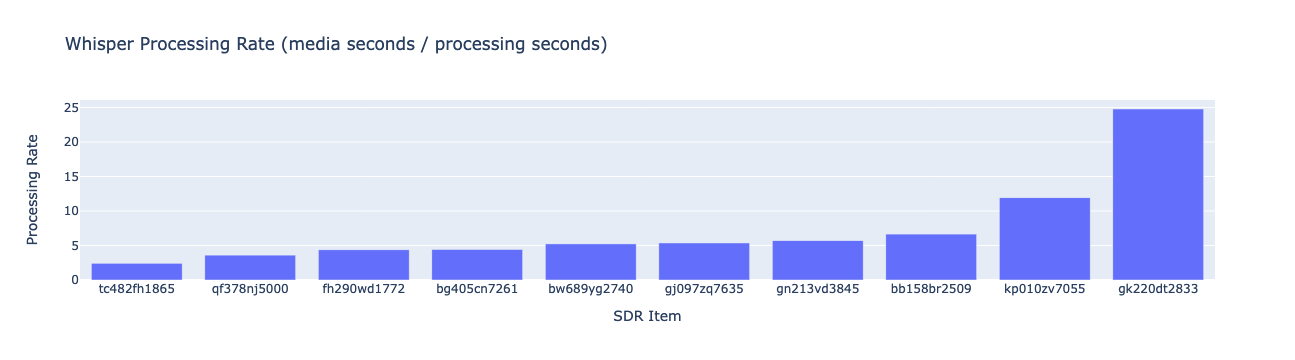

In [53]:
import plotly.express as xp

fig = xp.bar(
    whisper['processing_rate'].sort_values(),
    width=750,
    labels={
        'value': 'Processing Rate',
        'druid': 'SDR Item'
    },
    title='Whisper Processing Rate (media seconds / processing seconds)'
)
fig = fig.update_layout(showlegend=False)
fig

Well lets just take the average and then use it to calcuate an estimate:

In [54]:
avg_rate = whisper.processing_rate.mean()
avg_rate

7.444141249815791

In [57]:
175_766_400 / avg_rate

23611373.575743128

In [59]:
How many days is that?

Object `that` not found.


In [58]:
175_766_400 / avg_rate / 60 / 60 / 24

273.2797867562862